In [1]:
        import numpy as np
        import pandas as pd
        import seaborn as sns
        import matplotlib.pyplot as plt
        %matplotlib inline

In [2]:
df=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


 * **Checking normal ditribution of attributes** 

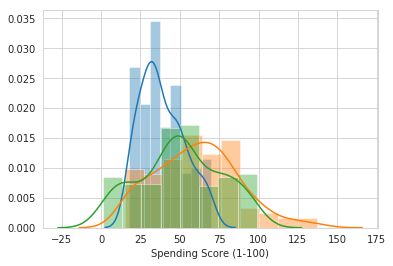

In [5]:
sns.set_style('whitegrid')
sns.distplot(df['Age'])
sns.distplot(df['Annual Income (k$)'])
sns.distplot(df['Spending Score (1-100)'])

****Standardization of each observations ****

In [6]:
a=df.iloc[:,2:5]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(a)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
f=scaler.transform(a)

****Making another dataframe df1 to store standardized value with other atributes ****

In [8]:
df1=pd.DataFrame(f,columns=['Age','Income','Spending'])

In [9]:
df1[['CustomerID','Gender']]=df[['CustomerID','Gender']]


In [10]:
df1=df1[['CustomerID','Gender','Age','Income','Spending']]

**Top 5 entries of df1 dataset**

In [11]:
df1.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


**Distplot after Standardization**

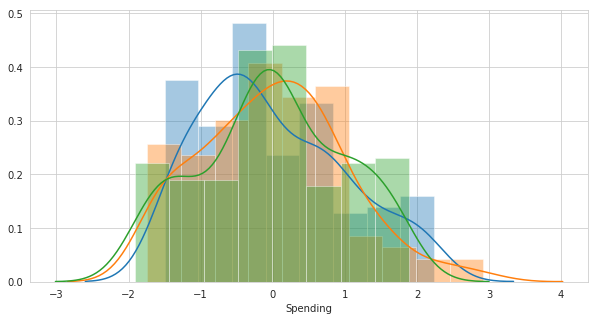

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(df1['Age'])
sns.distplot(df1['Income'])
sns.distplot(df1['Spending'])

**Pairplot of df1 dataset**

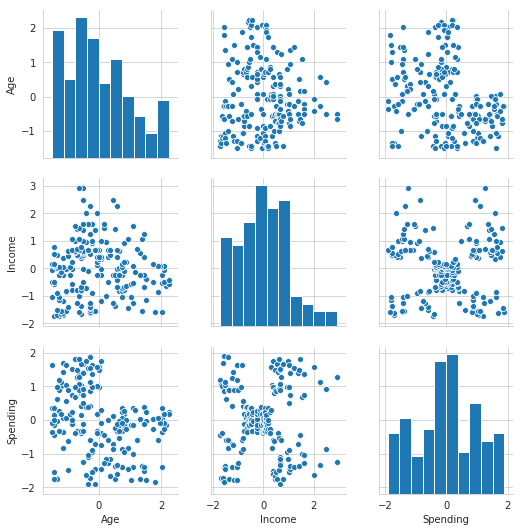

In [13]:
sns.pairplot(df1.iloc[:,2:5])

****Pairplot of df dataset****

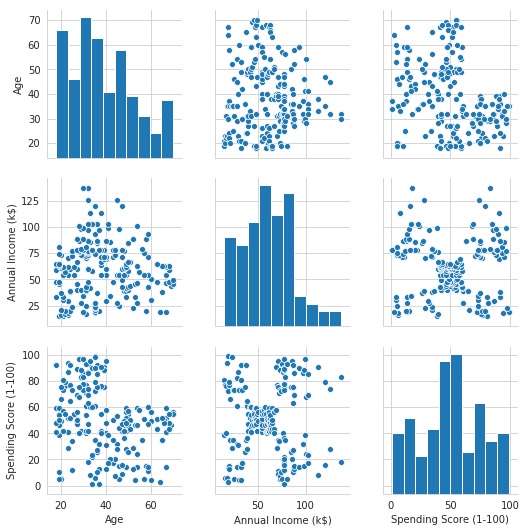

In [14]:
sns.pairplot(df.iloc[:,2:5])

In [15]:
from sklearn.cluster import KMeans

**Finding inertia value for each cluster**

In [16]:
wcss=[]
for i in range(1,20):
    kmeans=KMeans(i)
    kmeans.fit(df1.iloc[:,3:5])
    wcss.append(kmeans.inertia_)

**Plotting inertia value vs Number of Cluters**

Text(0, 0.5, 'WCSS')

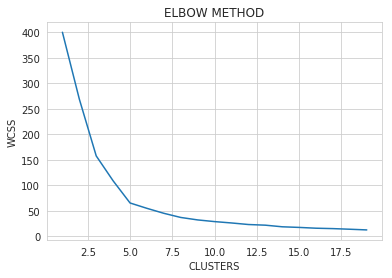

In [17]:
plt.plot(range(1,20),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('CLUSTERS')
plt.ylabel('WCSS')

After comprehending the graph,value of K would be 5

In [18]:
kmeans=KMeans(5)
kmeans.fit(df1.iloc[:,3:5])
predictions=kmeans.fit_predict(df1.iloc[:,3:5])
df['predictions']=predictions


**Cluster Analysis Annual Income vs Spending Score**

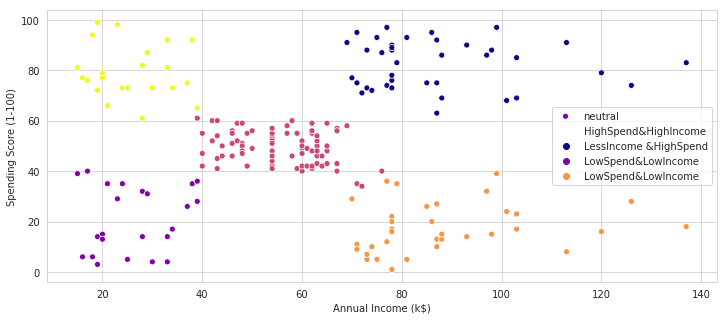

In [19]:
plt.figure(figsize=(12,5))
ax=sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='predictions',palette='plasma')
ax.legend(loc='right',labels=['neutral','HighSpend&HighIncome','LessIncome &HighSpend','LowSpend&LowIncome','LowSpend&LowIncome'])